In [1]:
import pandas as pd
import numpy as np
from particletracker.postprocess.postprocessing_methods import neighbours
from filehandling import BatchProcess
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

In [2]:
path="C:/Users/ppzmis/OneDrive - The University of Nottingham/Documents/Papers/Active Matter/"
folder = 'r0.66/Pe20/'
file="rv_*.dat"

startval = 1000

In [3]:

data = []
for i, filename in enumerate(BatchProcess(path + folder + file)):
    if i >= startval:
        data1 = np.loadtxt(filename, delimiter=' ', usecols=(0,1))
        data2 = np.reshape(data1[0::2,:], (-1,2,2))
        data3 = np.mean(data2, axis=1)
        df = pd.DataFrame(data3, columns=['x','y'])
        df['particle'] = df.index
        df['frame'] = i
        data.append(df)

df_all = pd.concat(data)
df_all.set_index('frame', inplace=True)


In [19]:
#Find min separation
def min_separation(df, frame=1010, id=1):
    df_frame = df.loc[frame].copy()
    df_frame.set_index('particle', inplace=True)
    df_frame['dr'] = ((df_frame['x'] - df_frame.loc[id]['x'])**2 + (df_frame['y'] - df_frame.loc[id]['y'])**2)
    df_frame = df_frame[df_frame.index != id]
    return df_frame['dr'].min(axis=0)


drminval = 1000
for i in range(1000):
    test_min = min_separation(df_all, id=i)
    if test_min < drminval:
        drminval = test_min
print(drminval)

#Min distance seems to be about 2.3 for r=0.25. Use a cutoff ~ 4. 
# At r = 0.66 it was 1.04 use cutoff=1.5.


1.040928432356264


In [33]:
settings = {'postprocess':{'neighbours':{'method':'delaunay',
                      'neighbours':6,
                      'cutoff':1.5}}}

frame_nums = list(set(df_all.index.to_list()))

for i in frame_nums:
    print(i)
    try:
        df_neighbours = neighbours(df_all, f_index=i, parameters=settings)
    except:
        print('issue with', str(i))
df_neighbours.to_csv(path + folder[:-1] + '_neighbours_cutoff' + str(settings['postprocess']['neighbours']['cutoff']) + '.csv')

1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
1145
1146
1147
1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199


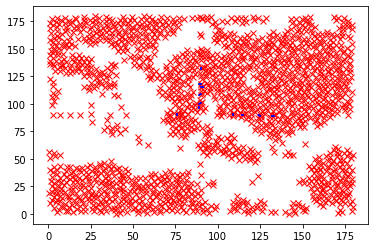

In [34]:

df_neighbours_frame = df_neighbours.loc[1051]
df_neighbours_frame.set_index('particle',inplace=True)
particle_ids = df_neighbours_frame.index.values

points = df_neighbours_frame[['x','y']].to_numpy()
plt.figure()
plt.plot(points[:,0],points[:,1],'rx')

for index, particle in enumerate(particle_ids):
    pt = df_neighbours_frame.loc[particle, ['x', 'y']].values
    pt1 = (int(pt[0]), int(pt[1]))
    neighbour_ids = df_neighbours_frame.loc[particle, 'neighbours']
    for index2, neighbour in enumerate(neighbour_ids):
        pt = df_neighbours_frame.loc[neighbour, ['x','y']].values
        pt2 = (int(pt[0]), int(pt[1]))
        plt.plot([pt1[0], pt2[0]],[pt1[1], pt2[1]], 'b-')



In [ ]:
#load df from file
df_neighbours = pd.read_csv(path + folder[:-1] + '_neighbours_cutoff' + str(settings['postprocess']['neighbours']['cutoff']) + '.csv')

Error: Pip module Unable to parse debugpy output, please log an issue with https://github.com/microsoft/vscode-jupyter is required for debugging cells. You will need to install it to debug cells.

In [17]:
def neighbour_time(df_neighbours, pid):
    df_neighbours.reset_index(inplace=True)
    df_neighbours.set_index('particle',inplace=True)
    df_particle = df_neighbours.loc[pid]
    df_particle.set_index('frame', inplace=True)
    temp_list = df_particle['neighbours'].values.tolist()
    neighbour_ids = np.array([j for sub in temp_list for j in sub])
    ids, freq = np.unique(neighbour_ids, return_counts=True)
    times = freq*5
    return times

time_neighbours = []
pids = np.unique(df_neighbours['particle'].values).tolist()

for pid in pids[0:500]:
    print(pid)
    time_neighbours.append(neighbour_time(df_neighbours.copy(), pid))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
times = np.array([j for sub in time_neighbours for j in sub])
np.savetxt(path + folder[:-1] + '_neighbourtimes.txt', times)
print(np.shape(times))
freq, binedges = np.histogram(times, bins=500)
bins = 0.5*(binedges[1:]+ binedges[:-1])
plt.figure()
plt.loglog(bins, freq, 'x')
plt.title(folder)
plt.xlabel('neighbour time')
plt.ylabel('freq')
plt.savefig(path + folder[:-1] + '.png')
print(bins[-1])
print(freq[-1])

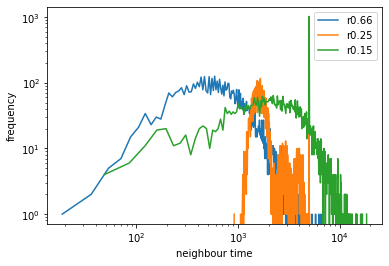

In [11]:
#Plot all data together
def get_plot_data(folder):
    data = np.loadtxt(path + folder[:-1] + '_neighbourtimes.txt')
    freq, binedges = np.histogram(data, bins=500)
    bins = 0.5*(binedges[1:]+ binedges[:-1])
    return bins, freq   

plt.figure(1)

folder_list = ['r0.66/Pe20/','r0.25/Pe20/','r0.15/Pe20/']
for foldername in folder_list:
    bins, freq = get_plot_data(foldername)
    plt.loglog(bins, freq)
plt.xlabel('neighbour time')
plt.ylabel('frequency')
plt.legend(['r0.66','r0.25','r0.15'])